# PlotCorr: Plotting Correlations Between SN and Host Properties

For the first step in figuring out possible correlations between empirical SN and Host galaxy properties, this code will produce plots comparing various properties. These include:

* SN peak magnitude and SALT color and stretch parameters
* Host galaxy colors, offset from host nucleus, surface brightness profile, and surface brightness at the location of the SN

This code assumes access to the file_parse.py, plot_funcs.py, calc_kcor.py, and calc_dmod.py packages in this repository.

Start by importing necessary packages:

In [1]:
%matplotlib inline
import numpy as np
import urllib
import os
import matplotlib
from matplotlib import pyplot as plt
from plot_funcs import *

Download the master data files, if we don't already have them. Currently, they are stored in Tom's public Dropbox folder.

In [2]:
targdir = 'data_files'
if not os.path.isdir(targdir):
    os.mkdir(targdir)

filenames = ('sdss_master.csv','snls_master.csv')

remotedir = 'https://dl.dropboxusercontent.com/u/5900205/empiriciSN_data/'

for filename in filenames:
    path = os.path.join(targdir, filename)
    url = os.path.join(remotedir, filename)
    if not os.path.isfile(path):
        urllib.urlretrieve(url, path)

Read in the lines from each file.

In [3]:
infile = open('data_files/sdss_master.csv','r')
sdss_lines = infile.readlines()
infile.close()

infile = open('data_files/snls_master.csv','r')
snls_lines = infile.readlines()
infile.close()

In all plots, SDSS SNe are displayed in blue and SNLS SNe are displayed in red. I am only including those SNLS SNe which had hosts that were also detected and modeled in SDSS, to keep the magnitudes and modeling consistent. For SNLS SNe, I show peak B-band magnitude and for SDSS SNe I show peak absolute r-band magnitude, as these were the magnitudes reported in the respective catalogs. The magnitudes are corrected for Galactic extinction but not host extinction, nor are they K-corrected.

First, plot SN properties vs. Host colors. All host mags have been K-corrected using the [K-corrections calculator](http://kcor.sai.msu.ru/), which only works for galaxies with redshift < 0.5. Galaxies with higher redshift are excluded from the plot.

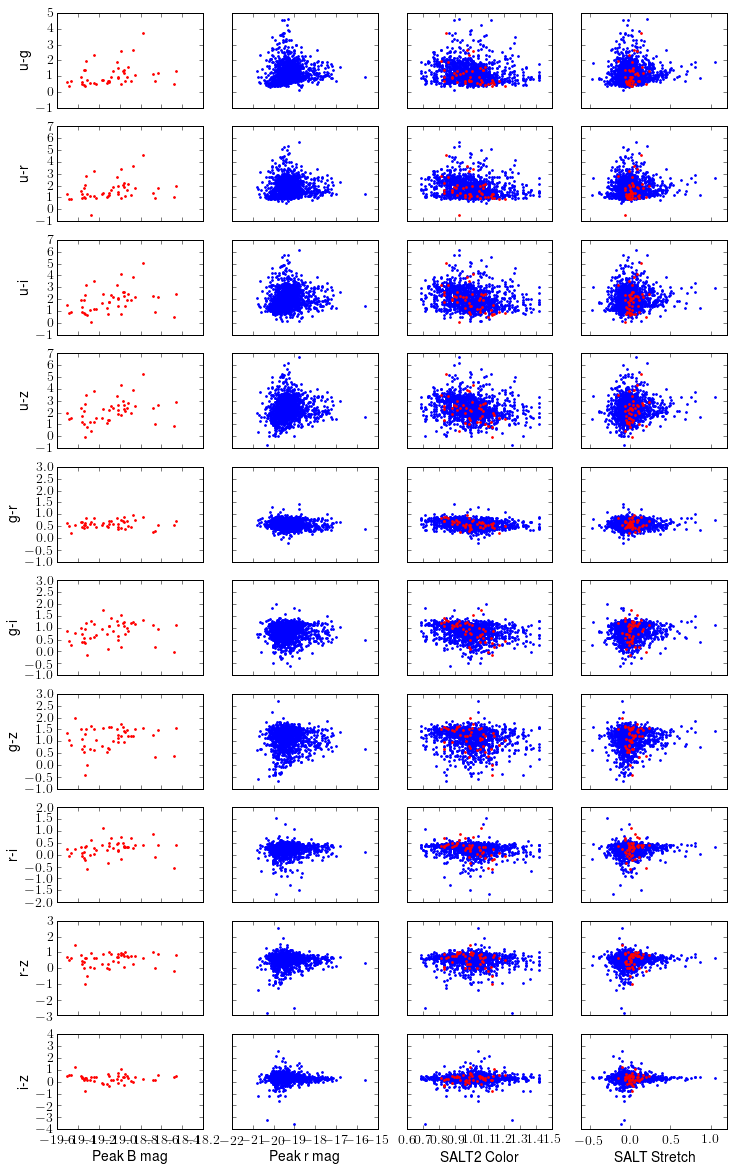

In [4]:
plot_color(sdss_lines,snls_lines)

Next plot SN properties vs. offset from Host, both in arcseconds and kpc. Distance moduli are calculated using the calc_dmod.py package.

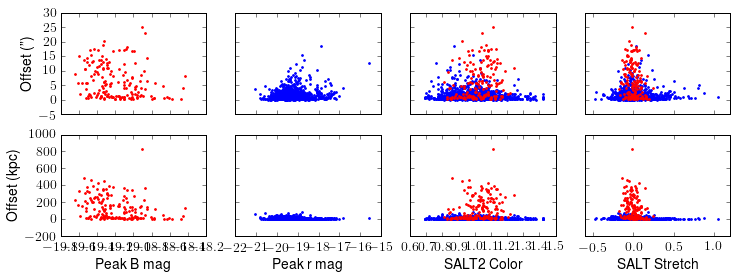

In [5]:
plot_sep(sdss_lines,snls_lines)

Finally, plot SN properties vs. host brightness profile and surface brightness at the location of the SN. Sersic indeces and properties, where available, were taken from the [NYU Value-Added Galaxy Catalog](http://sdss.physics.nyu.edu/vagc/). SDSS exponential and de Vaucouleurs model fits were used to determine the profiles of other galaxies. (The profile with higher likelihood from the SDSS model fit in the r-band was used to determine whether to use an exponential or de Vaucouleurs profile to calculate the surface brightness, as this was the same method used to determine which model to use to model the galaxy magnitudes). 

Surface brightness at the location of the SN is given in nanomaggies/arcsec$^2$ for those with a Sersic fit. As the half-light intensity is not given in the SDSS fits, the surface brightnesses from the exponential or de Vaucouleurs fits are shown as a function of $I_0$.

The row labelled "Sersic n" displays only those galaxies with Sersic profiles in the NYU VAC, while "Sersic n (all)" includes all galaxies, with a value of n=1 or n=4 assigned to those with exponential or de Vaucouleurs profiles, respectively.

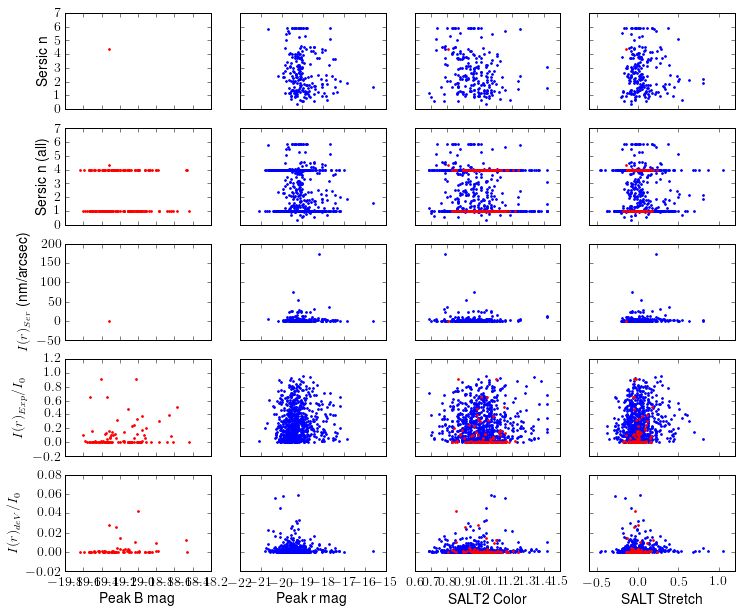

In [6]:
plot_prof(sdss_lines,snls_lines)